In [1]:
%reset
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib notebook
#%matplotlib nbagg
from scipy.interpolate import splrep, splev
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


/home/ubuntu/anaconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>


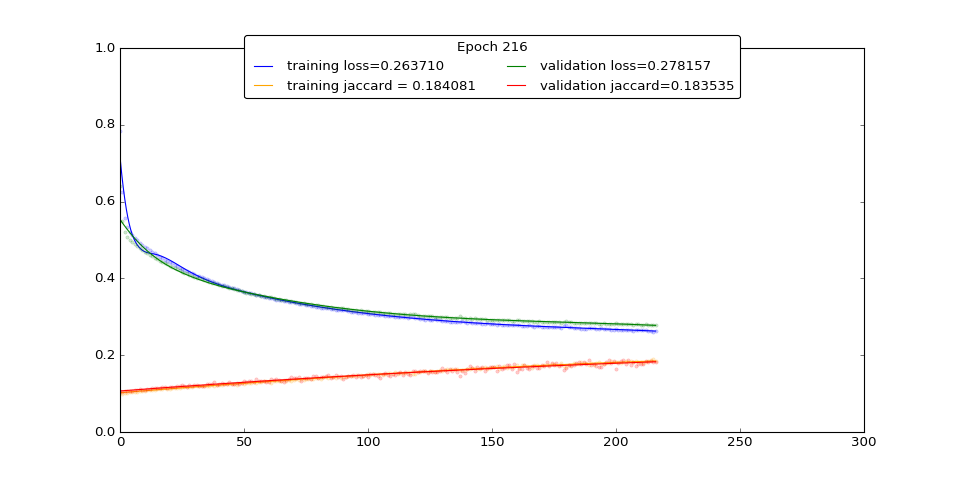

In [2]:
# displaying the text widget
run = widgets.Text(description="Run #", value='55', width=200)
#display(run)
button = widgets.Button(description="Update the graph")
#display(button)

widgets_ = HBox([run,button])
display(widgets_)

#data = pd.read_csv('./data/training_log_run_' + str(run.value))
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
ax.set_xlabel('Epoch')
ax.set_ylabel('Jaccard / Loss')
ax.set_title('Metrics vs time (epochs)')
ax.set_ylim([0,1])

def plotter(data):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 1e-2) #1e-2
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    if ax:
        ax.clear()
    # Training data
    ax.plot(data['epoch'],data['loss'], ".",color='blue',label='_nolegend_',alpha=0.2)
    ax.plot(data['epoch'],data['jaccard'], ".",color='orange',label='_nolegend_',alpha=0.2)
    
    x,y = smoothen('loss')
    ax.plot(x,y,'-',color='blue',label="training loss=%04f" %data['loss'].iloc[-1])
    
    x,y = smoothen('jaccard')
    ax.plot(x,y,'-',color='orange',label="training jaccard = %04f" %data['jaccard'].iloc[-1])
    
    # Validation data
    ax.plot(data['epoch'],data['val_loss'], ".",color='green',label='_nolegend_',alpha=0.2)
    ax.plot(data['epoch'],data['val_jaccard'], ".",color='red',label='_nolegend_',alpha=0.2)
    
    x,y = smoothen('val_loss')
    ax.plot(x,y,'-',color='green',label="validation loss=%04f" %data['val_loss'].iloc[-1])
    
    x,y = smoothen('val_jaccard')
    ax.plot(x,y,'-',color='red',label="validation jaccard=%04f" %data['val_jaccard'].iloc[-1])
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=False,title='Epoch %i' %data['epoch'].iloc[-1],fontsize='medium')
    ax.set_ylim([0,1])
    xlim = 250
    while xlim - data['epoch'].iloc[-1]<50:
        xlim += 50
    ax.set_xlim([0,xlim])
    plt.draw()

#plt.ion()
plt.show()

def on_button_clicked(b):
    data = pd.read_csv('./data/training_log_run_' + str(run.value))
    plotter(data)
    #fig.legend('','')
    #plt.draw()
def handle_submit(run):
    print(run.value)
    #plot_classifier(run.value)
    
button.on_click(on_button_clicked)
run.on_submit(handle_submit)

<IPython.core.display.Javascript object>


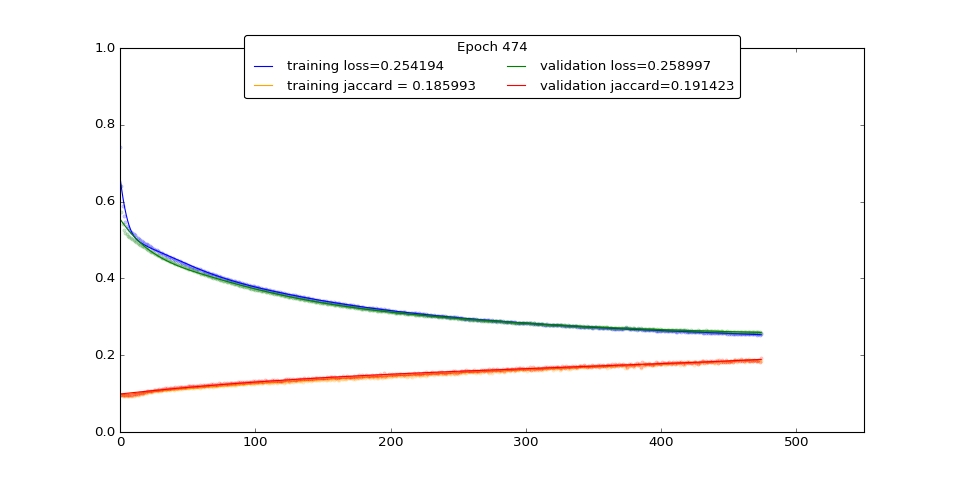

In [3]:
# displaying the text widget
run = widgets.Text(description="Run #", value='55', width=200)
#display(run)
button = widgets.Button(description="Update the graph")
#display(button)

widgets_ = HBox([run,button])
display(widgets_)

#data = pd.read_csv('./data/training_log_run_' + str(run.value))
fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(111)
ax.set_xlabel('Epoch')
ax.set_ylabel('Jaccard / Loss')
ax.set_title('Metrics vs time (epochs)')
ax.set_ylim([0,1])

def plotter(data):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 1e-2) #1e-2
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    if ax:
        ax.clear()
    # Training data
    ax.plot(data['epoch'],data['loss'], ".",color='blue',label='_nolegend_',alpha=0.2)
    ax.plot(data['epoch'],data['jaccard'], ".",color='orange',label='_nolegend_',alpha=0.2)
    
    x,y = smoothen('loss')
    ax.plot(x,y,'-',color='blue',label="training loss=%04f" %data['loss'].iloc[-1])
    
    x,y = smoothen('jaccard')
    ax.plot(x,y,'-',color='orange',label="training jaccard = %04f" %data['jaccard'].iloc[-1])
    
    # Validation data
    ax.plot(data['epoch'],data['val_loss'], ".",color='green',label='_nolegend_',alpha=0.2)
    ax.plot(data['epoch'],data['val_jaccard'], ".",color='red',label='_nolegend_',alpha=0.2)
    
    x,y = smoothen('val_loss')
    ax.plot(x,y,'-',color='green',label="validation loss=%04f" %data['val_loss'].iloc[-1])
    
    x,y = smoothen('val_jaccard')
    ax.plot(x,y,'-',color='red',label="validation jaccard=%04f" %data['val_jaccard'].iloc[-1])
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=False,title='Epoch %i' %data['epoch'].iloc[-1],fontsize='medium')
    ax.set_ylim([0,1])
    xlim = 250
    while xlim - data['epoch'].iloc[-1]<50:
        xlim += 50
    ax.set_xlim([0,xlim])
    plt.draw()

#plt.ion()
plt.show()

def on_button_clicked(b):
    data = pd.read_csv('./data/training_log_run_' + str(run.value))
    plotter(data)
    #fig.legend('','')
    #plt.draw()
def handle_submit(run):
    print(run.value)
    #plot_classifier(run.value)
    
button.on_click(on_button_clicked)
run.on_submit(handle_submit)

<IPython.core.display.Javascript object>


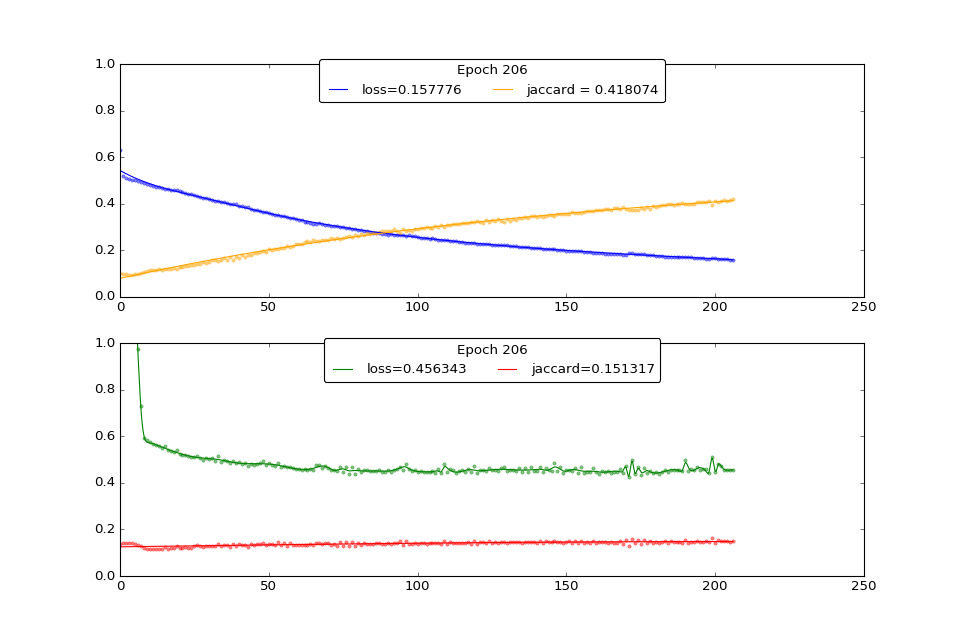

In [20]:
# displaying the text widget
run = widgets.Text(description="Run #", value='54', width=200)
#display(run)
button = widgets.Button(description="Update the graph")
#display(button)

widgets_ = HBox([run,button])
display(widgets_)

#data = pd.read_csv('./data/training_log_run_' + str(run.value))
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot(211)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Jaccard / Loss')
ax1.set_title('Metrics vs time (epochs)')
ax1.set_ylim([0,1])

ax2 = plt.subplot(212)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Jaccard / Loss')

def plotter(data):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 1e-2) #9e-3
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    if ax1:
        ax1.clear()
    ax1.plot(data['epoch'],data['loss'], ".",color='blue',label='_nolegend_',alpha=0.5)
    ax1.plot(data['epoch'],data['jaccard'], ".",color='orange',label='_nolegend_',alpha=0.5)
    x,y = smoothen('loss')
    ax1.plot(x,y,'-',color='blue',label="loss=%04f" %data['loss'].iloc[-1])
    x,y = smoothen('jaccard')
    ax1.plot(x,y,'-',color='orange',label="jaccard = %04f" %data['jaccard'].iloc[-1])
    #ax1.legend(loc='best')
    ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=False,title='Epoch %i' %data['epoch'].iloc[-1],fontsize='medium')
    ax1.set_ylim([0,1])
    
    if ax2:
        ax2.clear()
    ax2.plot(data['epoch'],data['val_loss'], ".",color='green',label='_nolegend_',alpha=0.5)
    ax2.plot(data['epoch'],data['val_jaccard'], ".",color='red',label='_nolegend_',alpha=0.5)
    x,y = smoothen('val_loss')
    ax2.plot(x,y,'-',color='green',label="loss=%04f" %data['val_loss'].iloc[-1])
    x,y = smoothen('val_jaccard')
    ax2.plot(x,y,'-',color='red',label="jaccard=%04f" %data['val_jaccard'].iloc[-1])
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=2, fancybox=True, shadow=False,title='Epoch %i' %data['epoch'].iloc[-1],fontsize='medium')
    ax2.set_ylim([0,1])
    
    plt.draw()

#plt.ion()
plt.show()

def on_button_clicked(b):
    data = pd.read_csv('./data/training_log_run_' + str(run.value))
    plotter(data)
    #fig.legend('','')
    #plt.draw()
def handle_submit(run):
    print(run.value)
    #plot_classifier(run.value)
    
button.on_click(on_button_clicked)
run.on_submit(handle_submit)

In [7]:
pd.read_csv('./data/training_log_run_46').tail()

,epoch,jaccard,loss,val_jaccard,val_loss
19,19,0.089584,0.472462,0.103091,0.472956
20,20,0.090179,0.470418,0.103408,0.470588
21,21,0.091305,0.467908,0.107647,0.471347
22,22,0.092806,0.464902,0.110586,0.469330
23,23,0.094243,0.461480,0.108779,0.464287


In [236]:
def plot_classifier(run):
    
    def smoothen(feature):
        x_int = np.linspace(data['epoch'].iloc[0],data['epoch'].iloc[-1],len(data['epoch'])*100)
        tck = splrep(data['epoch'], data[feature], k = 3, s = 9e-3)
        y_int = splev(x_int, tck, der = 0)
        return x_int,y_int
    
    data = pd.read_csv('./data/training_log_run_' + str(run))
    
    fig = plt.figure(figsize=(12, 12))

    ax = fig.add_subplot(211)
    ax.plot(data['epoch'],data['loss'], ".",color='blue',label='_nolegend_',alpha=0.5)
    ax.plot(data['epoch'],data['jaccard'], ".",color='orange',label='_nolegend_',alpha=0.5)
    x,y = smoothen('loss')
    ax.plot(x,y,'-',color='blue',label="Training loss epoch %i: %04f" %(data['epoch'].iloc[-1],data['loss'].iloc[-1]))
    x,y = smoothen('jaccard')
    ax.plot(x,y,'-',color='orange',label="Training jaccard epoch %i: %04f" %(data['epoch'].iloc[-1],data['jaccard'].iloc[-1]))
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Jaccard / Loss')
    plt.legend(loc='best')
    ax.set_title('Metrics vs time (epochs)')
    
    ax = fig.add_subplot(212)
    ax.plot(data['epoch'],data['val_loss'], ".",color='green',label='_nolegend_',alpha=0.5)
    ax.plot(data['epoch'],data['val_jaccard'], ".",color='red',label='_nolegend_',alpha=0.5)
    x,y = smoothen('val_loss')
    ax.plot(x,y,'-',color='green',label="Validation loss epoch %i: %04f" %(data['epoch'].iloc[-1],data['val_loss'].iloc[-1]))
    x,y = smoothen('val_jaccard')
    ax.plot(x,y,'-',color='red',label="Validation loss epoch %i: %04f" %(data['epoch'].iloc[-1],data['val_jaccard'].iloc[-1]))
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Jaccard / Loss')
    plt.legend(loc='best')
    #ax.set_title('Metrics vs time (epochs)')    
    
    plt.draw()
    #return fig

In [ ]:
plot_classifier(43)